In [3]:
%%capture
%run ./index.ipynb

### Constraint Violation (CV) As Objective

Another way of dealing with constraints is putting them into one of the objectives instead. Then, the goal is not only to find solutions that satisfy all constraints but also provide some trade-off of how much better performance one can achieve when relaxing the constraint a little bit. This can be helpful information for post-processing. Another advantage of this approach is that it is more robust against diversity loss. However, it is worth noting that this method might spend many function evaluations on infeasible solutions that might not be of interest. Moreover, if not the exact boundary solution is found, where the first objective (cv) is minimized, the best solution might still be slightly infeasible.

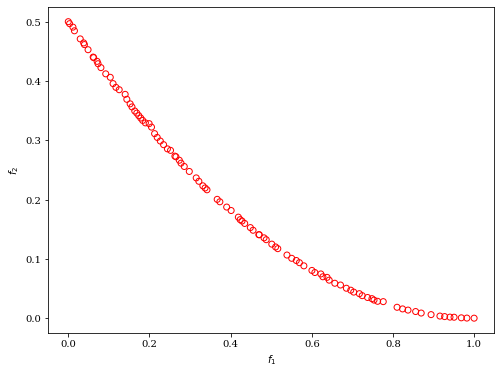

In [12]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.constraints.as_obj import ConstraintsAsObjective
from pymoo.optimize import minimize
from pymoo.problems.single import G1
from pymoo.visualization.scatter import Scatter

problem = G1()

problem = ConstrainedProblem()

algorithm = NSGA2(pop_size=100)

res = minimize(ConstraintsAsObjective(problem),
               algorithm,
               ('n_gen', 300),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), marker="*", color="black", alpha=0.7, s=100)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

Finally, the least infeasible solution can then be obtained by:

In [14]:
from pymoo.core.evaluator import Evaluator
from pymoo.core.individual import Individual

cv = res.F[:, 0]
least_infeas = cv.argmin()
x = res.X[least_infeas]

sol = Individual(X=x)
Evaluator().eval(problem, sol)

print("Best solution found: \nX = %s\nF = %s\nCV = %s" % (sol.X, sol.F, sol.CV))

Best solution found: 
X = [0.49204314 0.50823748]
F = [0.50041179]
CV = [0.]
